In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [12]:
# import data
data = pd.read_csv("donut.csv", names=['x1','x2','c'], delim_whitespace=True)

N = data.shape[0]


"""
make X. equation for an ellipse is (x_1-mu_1)^2 / a^2 + (x_2-mu_2)^2 / b^2 = 1.
To engineer the features, expand the terms to get feautures (x_1^2) (x_1 mu_1) (mu_1)^2 (x_2^2) (x_2 mu_2) (mu_2)^2. the mu factors are absorbed in the weights

OR

we can center the data around 0 and just use features: bias + x_1^2 x_2^2
"""

# center the data around 0
x1 = data.x1.values - data.x1.values.sum()/N
x2 = data.x2.values - data.x2.values.sum()/N
# X = np.column_stack((np.ones((N,1)), x1**2, x2**2))
X = np.column_stack((np.ones((N,1)), x1**2, x2**2, x1*x2))
y = data.c.astype(int)

def sigmoid(h):
    return 1/(1 + np.exp(-h))

def cross_entropy(y, p_hat):
    return -np.sum(y*np.log(p_hat) + (1 - y)*np.log(1 - p_hat))

def accuracy(y, p_hat):
    return np.mean(y == np.round(p_hat))

w = np.random.randn(X.shape[1])
# w = np.random.randn(4)
eta = 1e-3
epochs = int(1e3)
J = [0]*epochs

for epoch in range(epochs):
    phat = sigmoid(X.dot(w))
    J[epoch] = cross_entropy(y, phat)
    w -= eta*X.T.dot(p_hat - y)

# # plot objective junction
# fig = plt.figure()
# plt.plot(J)
# fig.savefig("J.pdf")
# plt.close(fig)

# xrange = 8
# xm = np.linspace(-xrange,xrange,100)
# xm,ym = np.meshgrid(xm,xm)
# Z = w[0] + w[1]*xm**2 + w[2]*ym**2 + w[3]*xm*ym

# # make new figure
# fig,ax = plt.subplots()
# fig.suptitle("'Donut' Logistic Regression Classification Problem")
# ax.scatter(x1, x2, c=y, label='data', alpha=.5)
# ax.contour(xm,ym,Z, [0], colors='r', linewidths=2)
# ax.set_aspect(1)
# ax.set_title("Centered Around Mean")
# ax.set_xlabel('x1')
# ax.set_ylabel('x2')
# ax.legend()

# # save the figure
# fig.savefig("donut.pdf")
# plt.close(fig)

print("Accuracy: {:0.4f}".format(accuracy(y,p_hat)))

/home/jacob/.local/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/home/jacob/.local/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


Accuracy: 0.9590


In [27]:
def one_hot_encode(y):
    
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def confusion_matrix(Y,Yhat):
    return np.matmul(Y.T,Yhat)

def precision(y,yhat):
    return y.dot(yhat) / yhat.sum()

def recall(y,yhat):
    return y.dot(yhat) / y.sum()

def f_score(y,yhat):
    p = precision(y,yhat)
    r = recall(y,yhat)
    return 2*p*r / (p+r)

def roc_auc(phat,yhat,y, show_curve=False):
    roc_matrix = np.column_stack((phat,yhat,y))
    roc_matrix = roc_matrix[roc_matrix[:,0].argsort()[::-1],:]
    
    tpr = np.cumsum(roc_matrix[:,1]*roc_matrix[:,2]) / roc_matrix[:,2].sum()
    fpr = np.cumsum(roc_matrix[:,1]*(1-roc_matrix[:,2])) / (1 - roc_matrix[:,2].sum())
    
    tpr = np.array([0] + tpr.tolist() + [1])
    fpr = np.array([0] + fpr.tolist() + [1])
    
    if show_curve:
        plt.figure()
        plt.step(fpr,tpr)
        
    return tpr[1:].dot(np.diff(fpr))

In [34]:
thresh = 0.5

yhat = (p_hat > thresh).astype(np.int32)
Y = one_hot_encode(y)
Yhat = one_hot_encode(yhat)

confusion_matrix(Y,Yhat)

array([[1858.,  142.],
       [  22., 1978.]])

In [35]:
print("precision: {:0.4f}".format(precision(y,yhat)))

precision: 0.9330


In [36]:
print("recall: {:0.4f}".format(recall(y,yhat)))

recall: 0.9890


In [37]:
print("F-score: {:0.4f}".format(f_score(y,yhat)))

F-score: 0.9602


1.0709984992496249

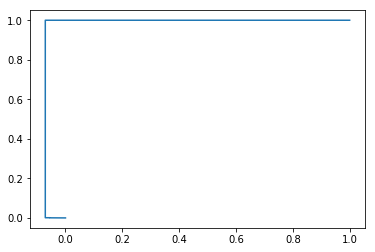

In [38]:
auc = roc_auc(phat,yhat,y,show_curve=True)
auc